## Numerical Integration

### Trapezoid Rule

Separate integration $I=\int_a^bf(x)$ into N parts and approximate the area using trapezoid:

$$\Delta I=\frac{f(x)+f(x+h)}{2}h$$

Local error: $O(h^3)$; global error: $O(h^2)$.

### Simpson's Rule

Separate integration into even number of subintervals and approximate the area using:

$$\int_{a}^{b} f(x) d x=\frac{\Delta x}{3}[f(a)+4 f(a+\Delta x)+f(b)]$$

where

$$\Delta x = \frac{b-a}{2}$$

#### Example:

Evaluate the integral $\int_0^{\pi} sinx dx $using Trapezoid and Simpson's rule. Evaluate the integral for $N=4,8,16,...,1024$, and compare the accuracy of the methods.

#### Code Example (Julia language):

N:4	 Integral:1.6184387143021417
N:8	 Integral:1.8990918857100074
N:16	 Integral:1.974417396196329
N:32	 Integral:1.9935819558453753
N:64	 Integral:1.9983940867244456
N:128	 Integral:1.999598433999681
N:256	 Integral:1.99989960301918
N:512	 Integral:1.9999749004122394
N:1024	 Integral:1.9999937250816502


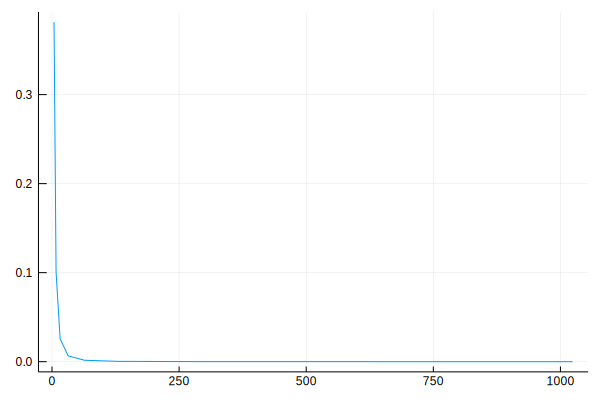

In [3]:
using Plots

# define function to be integrated
function func(x::Float64)
    return sin(x)
end

# Trapezoid Rule
error = []
nList = [2^i for i in 2:10]
for N in nList
    x = [0.0+i*π/N for i in 0:N]
    funcValue = func.(x)
    integral = (sum(funcValue)+sum(funcValue[2:(N-1)])) * (π/N) / 2
    println("N:", N, "\t Integral:", integral)
    push!(error, abs(integral-2.0))
end

# plot
plot(nList, error, leg=false)

N:4	 Integral:2.0045597549844207
N:8	 Integral:2.0002691699483877
N:16	 Integral:2.0000165910479355
N:32	 Integral:2.0000010333694127
N:64	 Integral:2.000000064530002
N:128	 Integral:2.000000004032257
N:256	 Integral:2.0000000002520024
N:512	 Integral:2.000000000015749
N:1024	 Integral:2.0000000000009845


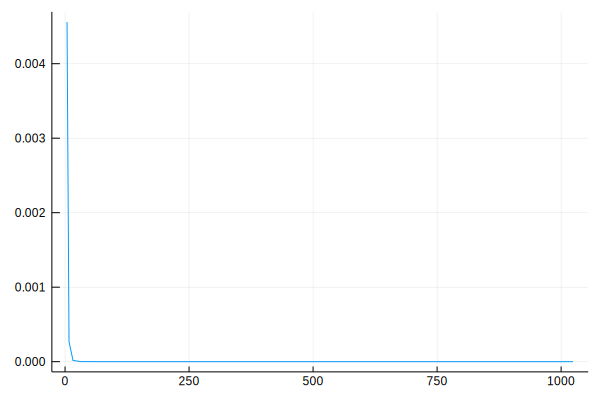

In [4]:
# Simpson's Rule
error = []
nList = [2^i for i in 2:10]
for N in nList
    x = [0.0+i*π/N for i in 0:N]
    integral = 0
    for i in 1:2:(N-1)
        integral += (π/N) / 3 * (func(x[i])+4*func(x[i+1])+func(x[i+2]))
    end
    println("N:", N, "\t Integral:", integral)
    push!(error, abs(integral-2.0))
end

# plot
plot(nList, error, leg=false)